##COMPONENTES

<ul>
  <li>Igor Bruno Damasceno  </li>
  <li>Isaac Kennedy Diniz Gomes</li>           
  <li>Carlos Vinícius dos Santos </li>
  <li>Daniel Costa Smith de Medeiros </li>
</ul>






In [0]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
#URLs
turma_2017_2_url = 'http://bit.do/turmas-2017-2'
turma_2017_1_url = 'http://bit.do/turmas-2017-1'
turma_2016_2_url = 'http://bit.do/turmas-2016-2'


#notas_2018_1_url = 'http://bit.do/notas-2018-1'
notas_2017_2_url = 'http://bit.do/notas-2017-2'
notas_2017_1_url = 'http://bit.do/notas-2017-1'
notas_2016_2_url = 'http://bit.do/notas-2016-2'

disciplinas_url = 'http://bit.do/componentes'

docentes_url = 'http://bit.do/set_docentes'

In [0]:
#Leitura dos datasets
turma_2016_2 = pd.read_csv(turma_2016_2_url, sep=';')
turma_2017_1 = pd.read_csv(turma_2017_1_url, sep=';')
turma_2017_2 = pd.read_csv(turma_2017_2_url, sep=';')

notas_2016_2 = pd.read_csv(notas_2016_2_url, sep=';')
notas_2017_2 = pd.read_csv(notas_2017_2_url, sep=';')
notas_2017_1 = pd.read_csv(notas_2017_1_url, sep=';')

docentes_url = pd.read_csv(docentes_url, sep=';')

#No dataset de disciplinas, temos alguns campos que utilizam o separador
#internamente, então temos que filtrar as colunas que fazem isso para
#fazer a leitura corretamente.
disciplinas = pd.read_csv(disciplinas_url, sep=';',
                          usecols=["id_componente","codigo",
                                   "nivel","nome","unidade_responsavel"])

In [0]:
#Concatenação e limpeza do dataset de turma
#Como os datasets de turmas tem colunas referentes ao ano e semestre,
#podemos criar um só dataset com todas as turmas
turmas = pd.concat([turma_2016_2, turma_2017_2, turma_2017_1])

#Retira uma coluna lixo gerada durante a concatenação
turmas.drop(columns='Unnamed: 25', inplace=True)

#Renomear a coluna id_componente_curricular para que seja o mesmo nome da 
#coluna correspondente no dataset de disciplinas e o merge seja feito 
#corretamente
turmas.rename(columns={'id_componente_curricular': 'id_componente'},
              inplace=True)

#Os tipos tambem precisam ser os mesmos
turmas.id_componente = turmas.id_componente.astype(str)

In [0]:
#Limpeza do dataset de disciplinas
disciplinas.dropna(inplace=True)
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]

In [0]:
#Juntando os datasets disciplinas e turmas e limpando o resultado
cols = ['id_turma', 'id_docente_interno', 'codigo', 'nivel_ensino', 'nome',
       'unidade_responsavel', 'situacao_turma', 'capacidade_aluno',
       'descricao_horario']

turmas_disciplinas = pd.merge(turmas, disciplinas, on='id_componente')[cols]
turmas_disciplinas.dropna(inplace=True)

In [0]:
#Filtrar as turmas cujo codigo contem IMD e estao consolidadas e concatenar o
#resultado com o dataset de docentes
turmas_imd = turmas_disciplinas[turmas_disciplinas.codigo.str.contains("IMD")]
turmas_imd = turmas_imd[turmas_imd.situacao_turma == 'CONSOLIDADA']
turmas_imd.rename(columns={'id_docente_interno': 'id_servidor'}, inplace=True)
turmas_imd.capacidade_aluno = turmas_imd.capacidade_aluno.astype(np.int64)
turmas_imd.id_servidor = turmas_imd.id_servidor.astype(np.int64)

In [0]:
turmas_edb = turmas_imd[turmas_imd.codigo == 'IMD0029']
turmas_edb

,id_turma,id_servidor,codigo,nivel_ensino,nome,unidade_responsavel,situacao_turma,capacidade_aluno,descricao_horario
9164,57586177,62353,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,60,35M12 (25/07/2016 - 17/12/2016)
9165,57586351,5757975,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,60,35T12 (25/07/2016 - 17/12/2016)
9166,57586359,5757905,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,60,35N12 (25/07/2016 - 17/12/2016)
9167,57586359,5757071,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,60,35N12 (25/07/2016 - 17/12/2016)
9168,57586361,5757883,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,40,35N34 (25/07/2016 - 17/12/2016)
9169,57608404,62353,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,40,35M12 (24/07/2017 - 16/12/2017)
9170,57608406,5758815,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,40,35N12 (24/07/2017 - 16/12/2017)
9171,57608407,5757883,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,40,35N34 (24/07/2017 - 16/12/2017)
9172,57608683,5757905,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,41,35M56 (24/07/2017 - 16/12/2017)
9173,57597598,62353,IMD0029,GRADUAÇÃO,ESTRUTURA DE DADOS BÁSICAS I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,40,35M12 (13/02/2017 - 01/07/2017)


In [0]:
notas = pd.concat([notas_2016_2, notas_2017_2, notas_2017_1])
#Caso apareça uma coluna com lixo com nome Unnamed: x para voces, basta ativar
#a linha abaixo substituindo o x com o numero que da o nome da coluna
notas.drop(columns='Unnamed: 10', inplace=True)
notas.dropna(inplace=True)
notas_edb = notas.loc[notas['id_turma'].isin([57600131, 57597710, 57597708, 57597598, 57597598, 57608407, 57608406, 57608404])]
semestre_list = []
for value in notas_edb.id_turma:
  if value == (57600131 or 57597710 or 57597708 or 57597598):
    semestre_list.append('2017.1')
  elif value == (57597598 or 57608407 or 57608406 or 57608404):
    semestre_list.append('2017.2')
  else:
    semestre_list.append('2016.2')

se = pd.Series(semestre_list)
notas_edb['semestre'] = se.values
#notas_edb['semestre'].unique()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5,0.98,'Média geral da disciplina')

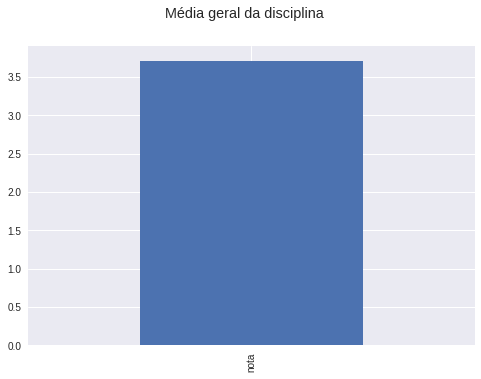

In [0]:
#notas_edb

# Média global
ax = notas_edb[['nota']].mean().plot(kind='bar')
plt.suptitle('Média geral da disciplina')

Index(['2016.2', '2017.1', '2017.2'], dtype='object', name='semestre')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0.98,'Médias por semestre')

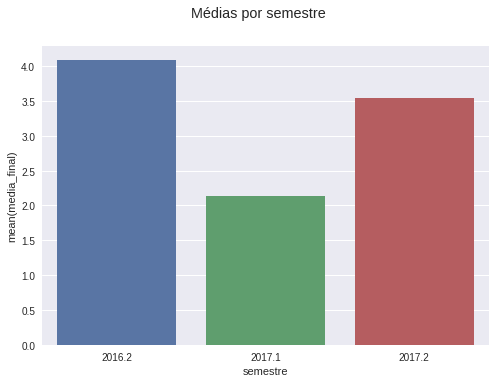

In [0]:

# Médias por semestre
notas_edb_por_semestre = notas_edb.groupby(['semestre']).mean()[['media_final']]
sns.barplot(x=notas_edb_por_semestre.index, y=notas_edb_por_semestre.media_final)
plt.suptitle('Médias por semestre')

Text(0.5,0.98,'Histograma de média global')

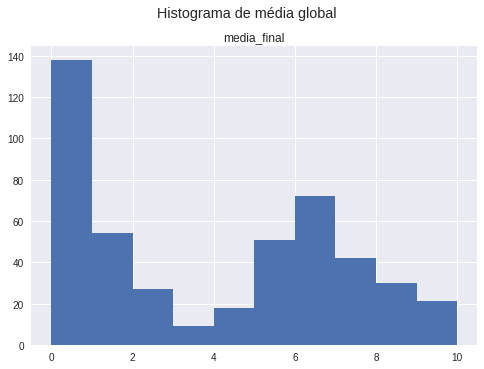

In [0]:
# Histograma de nota global
axes = notas_edb.hist(column='media_final')
plt.suptitle('Histograma de média global')

Text(0.5,0.98,'Histograma de média por semestre')

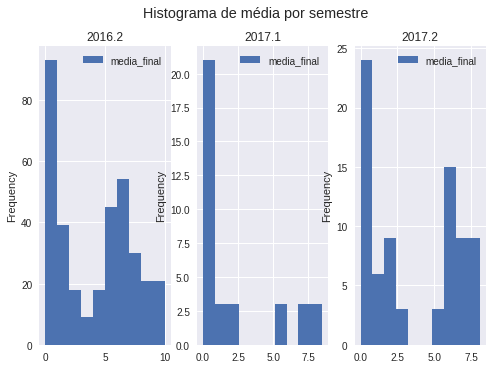

In [0]:
notas_alunos_2016_2 = notas_edb.copy().loc[notas_edb['semestre'].isin(['2016.2'])][['media_final']]
notas_alunos_2017_1 = notas_edb.copy().loc[notas_edb['semestre'].isin(['2017.1'])][['media_final']]
notas_alunos_2017_2 = notas_edb.copy().loc[notas_edb['semestre'].isin(['2017.2'])][['media_final']]

fig, axes = plt.subplots(nrows=1, ncols=3)

ax1 = notas_alunos_2016_2.plot(ax=axes[0],kind='hist',title='2016.2')
ax2 = notas_alunos_2017_1.plot(ax=axes[1],kind='hist',title='2017.1')
ax3 = notas_alunos_2017_2.plot(ax=axes[2],kind='hist',title='2017.2')

plt.suptitle('Histograma de média por semestre')

Text(0.5,0.98,'Gráfico de caixas de média por semestre')

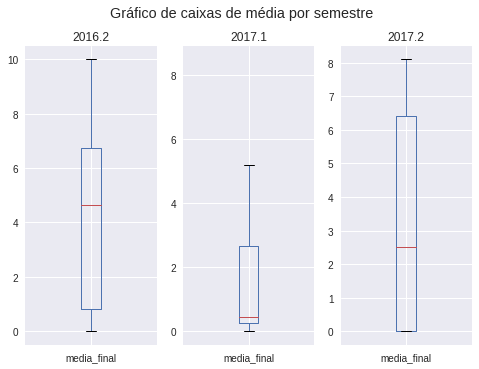

In [0]:
notas_alunos_2016_2 = notas_edb.copy().loc[notas_edb['semestre'].isin(['2016.2'])][['media_final']]
notas_alunos_2017_1 = notas_edb.copy().loc[notas_edb['semestre'].isin(['2017.1'])][['media_final']]
notas_alunos_2017_2 = notas_edb.copy().loc[notas_edb['semestre'].isin(['2017.2'])][['media_final']]

fig, axes = plt.subplots(nrows=1, ncols=3)

ax1 = notas_alunos_2016_2.plot(ax=axes[0],kind='box',title='2016.2')
ax2 = notas_alunos_2017_1.plot(ax=axes[1],kind='box',title='2017.1')
ax3 = notas_alunos_2017_2.plot(ax=axes[2],kind='box',title='2017.2')

plt.suptitle('Gráfico de caixas de média por semestre')

#Desvio padrão

In [0]:
#O desvio padrão mostra o quanto os valores na distribuição variam ao redor de sua média.
notas_edb_mean = notas_edb.nota.mean()
notas_edb_2017_2_mean = notas_edb[notas_edb.semestre == '2017.2'].nota.mean()
notas_edb_2017_1_mean = notas_edb[notas_edb.semestre == '2017.1'].nota.mean()
notas_edb_2016_2_mean = notas_edb[notas_edb.semestre == '2016.2'].nota.mean()

In [0]:
#Desvio padrão das notas de todas as turmas
notas_edb.nota.std()

3.397409205541001

In [0]:
#Desvio padrão das notas das turmas de 2017.2
#Bem próximo ao desvio padrão das turmas num geral
#Desvio padrão maior do que do semestre anterior (2017.1)

notas_edb_2017_2 = notas_edb[notas_edb.semestre == '2017.2']
std_notas_edb_2017_2 = notas_edb_2017_2.nota.std()
std_notas_edb_2017_2

3.406967259517753

In [0]:
#Desvio padrão das notas das turmas de 2017.1
#Desvio padrão menor do que o de todas as turmas num geral

notas_edb_2017_1 = notas_edb[notas_edb.semestre == '2017.1']
std_notas_edb_2017_1 = notas_edb_2017_1.nota.std()
std_notas_edb_2017_1

3.051498460943878

In [0]:
#Desvio padrão das notas das turmas de 2016.2
#Bem próximo ao desvio padrão das turmas num geral
#Bem próximo ao desvio padrão das turmas de 2017.2
#Maior do que o desvio do semestre seguinte (2017.1)

notas_edb_2016_2 = notas_edb[notas_edb.semestre == '2016.2']
std_notas_edb_2016_2 = notas_edb_2016_2.nota.std()
std_notas_edb_2016_2

3.392312662951296

In [0]:
#Desvio padrão das notas por unidade
#Menor desvio padrão na primeira unidade
#Desvio padrão da terceira unidade maior que todos os desvios até agora
#^ Pode significar maior dificuldade na terceira unidade?

std_notas_edb_1_unidade = notas_edb[notas_edb.unidade == 1.0].nota.std()
std_notas_edb_2_unidade = notas_edb[notas_edb.unidade == 2.0].nota.std()
std_notas_edb_3_unidade = notas_edb[notas_edb.unidade == 3.0].nota.std()

print(std_notas_edb_1_unidade, std_notas_edb_2_unidade, std_notas_edb_3_unidade)

3.0279417015749877 3.143975299005568 3.9214728406941926


In [0]:
#Desvio padrão das notas de 2016.2 por unidade

std_notas_edb_2016_2_1_unidade = notas_edb_2016_2[notas_edb_2016_2.unidade == 1.0].nota.std()
std_notas_edb_2016_2_2_unidade = notas_edb_2016_2[notas_edb_2016_2.unidade == 2.0].nota.std()
std_notas_edb_2016_2_3_unidade = notas_edb_2016_2[notas_edb_2016_2.unidade == 3.0].nota.std()

print(std_notas_edb_2016_2_1_unidade, std_notas_edb_2016_2_2_unidade, std_notas_edb_2016_2_3_unidade)

3.068100980767404 3.237151745638109 3.80713249980408


In [0]:
#Desvio padrão das notas de 2017.1 por unidade

std_notas_edb_2017_1_1_unidade = notas_edb_2017_1[notas_edb_2017_1.unidade == 1.0].nota.std()
std_notas_edb_2017_1_2_unidade = notas_edb_2017_1[notas_edb_2017_1.unidade == 2.0].nota.std()
std_notas_edb_2017_1_3_unidade = notas_edb_2017_1[notas_edb_2017_1.unidade == 3.0].nota.std()

print(std_notas_edb_2017_1_1_unidade, std_notas_edb_2017_1_2_unidade, std_notas_edb_2017_1_3_unidade)

2.8498272143263614 3.295853685337308 3.1867148468527136


In [0]:
#Desvio padrão das notas de 2017.2 por unidade
#O desvio da 3a unidade foi o maior até agora
#O desvio da 2a unidade foi o menor até agora

std_notas_edb_2017_2_1_unidade = notas_edb_2017_2[notas_edb_2017_2.unidade == 1.0].nota.std()
std_notas_edb_2017_2_2_unidade = notas_edb_2017_2[notas_edb_2017_2.unidade == 2.0].nota.std()
std_notas_edb_2017_2_3_unidade = notas_edb_2017_2[notas_edb_2017_2.unidade == 3.0].nota.std()

print(std_notas_edb_2017_2_1_unidade, std_notas_edb_2017_2_2_unidade, std_notas_edb_2017_2_3_unidade)

2.794246836737117 2.4439816189665082 4.60732527111405


In [0]:
#Desvio padrão da média final
std_media_notas_edb = notas_edb.media_final.std()
std_media_notas_edb

3.150044772077072

In [0]:
#Desvio padrão da média final de 2016.2
#O maior dos 3 semestres

std_media_notas_edb_2016_2 = notas_edb[notas_edb.semestre == '2016.2'].media_final.std()
std_media_notas_edb_2016_2

3.133158772147312

In [0]:
#Desvio padrão da média final de 2017.1
#O menor dos 3 semestres

std_media_notas_edb_2017_1 = notas_edb[notas_edb.semestre == '2017.1'].media_final.std()
std_media_notas_edb_2017_1

2.935436205112575

In [0]:
#Desvio padrão da média final de 2017.2

std_media_notas_edb_2017_2 = notas_edb[notas_edb.semestre == '2017.2'].media_final.std()
std_media_notas_edb_2017_2

3.0884658616571072

In [0]:
#Desvio padrão do numero total de faltas

std_faltas_edb = notas_edb.numero_total_faltas.std()
std_faltas_edb

17.808135021110626

In [0]:
#Desvio padrão do numero total de faltas por semestre
#Desvio padrão das faltas do 2o semestre maior
#Desvio padrão das faltas do 1o semestre menor

std_faltas_edb_2016_2 = notas_edb[notas_edb.semestre == '2016.2'].numero_total_faltas.std()
std_faltas_edb_2017_1 = notas_edb[notas_edb.semestre == '2017.1'].numero_total_faltas.std()
std_faltas_edb_2017_2 = notas_edb[notas_edb.semestre == '2017.2'].numero_total_faltas.std()

print(std_faltas_edb_2016_2,std_faltas_edb_2017_1,std_faltas_edb_2017_2)

15.978956150205924 22.563561015812322 18.07493559333744


# Gráficos com Desvio Padrão

**Desvio padrão por semestre**

[3.133158772147312, 2.935436205112575, 3.0884658616571072]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0.98,'Desvio padrão por semestre')

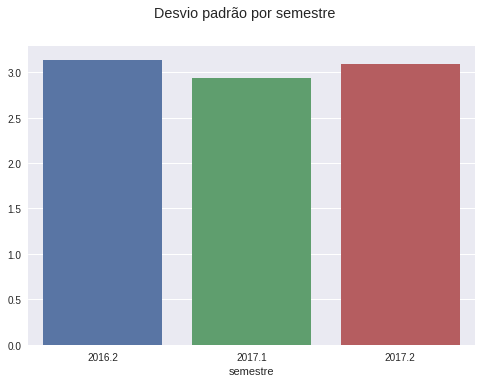

In [0]:
notas_edb_por_semestre = notas_edb.groupby(['semestre']).mean()[['media_final']]
desvio_padrao_por_semestre = [std_media_notas_edb_2016_2,std_media_notas_edb_2017_1,std_media_notas_edb_2017_2]
print(desvio_padrao_por_semestre)
sns.barplot(x=notas_edb_por_semestre.index, y=desvio_padrao_por_semestre)
plt.xticks(np.arange(3),('2016.2','2017.1','2017.2'))
plt.suptitle('Desvio padrão por semestre')

**Desvio padrão por unidade de 2016.2**

[3.068100980767404, 3.237151745638109, 3.80713249980408]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0.98,'Desvio padrão por Unidade de 2016.2')

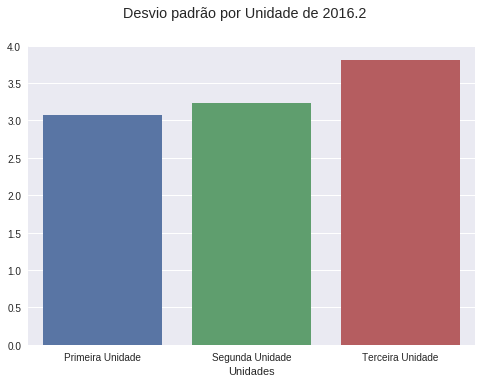

In [0]:
notas_edb_por_semestre = notas_edb.groupby(['semestre']).mean()[['media_final']]
desvio_padrao_por_unidade = [std_notas_edb_2016_2_1_unidade,std_notas_edb_2016_2_2_unidade,std_notas_edb_2016_2_3_unidade]
print(desvio_padrao_por_unidade)
sns.barplot(x=notas_edb_por_semestre.index, y=desvio_padrao_por_unidade)
plt.xticks(np.arange(3),('Primeira Unidade','Segunda Unidade','Terceira Unidade'))
plt.xlabel("Unidades")
plt.suptitle('Desvio padrão por Unidade de 2016.2')

**Desvio padrão por unidade de 2017.1**

[2.8498272143263614, 3.295853685337308, 3.1867148468527136]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0.98,'Desvio padrão por Unidade de 2017.1')

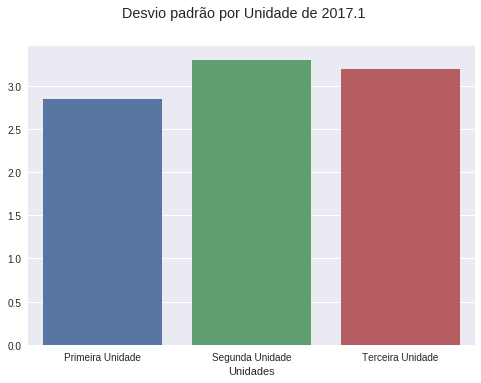

In [0]:
notas_edb_por_semestre = notas_edb.groupby(['semestre']).mean()[['media_final']]
desvio_padrao_por_unidade = [std_notas_edb_2017_1_1_unidade,std_notas_edb_2017_1_2_unidade,std_notas_edb_2017_1_3_unidade]
print(desvio_padrao_por_unidade)
sns.barplot(x=notas_edb_por_semestre.index, y=desvio_padrao_por_unidade)
plt.xticks(np.arange(3),('Primeira Unidade','Segunda Unidade','Terceira Unidade'))
plt.xlabel("Unidades")
plt.suptitle('Desvio padrão por Unidade de 2017.1')

**Desvio padrão por unidade de 2017.2**

[2.794246836737117, 2.4439816189665082, 4.60732527111405]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0.98,'Desvio padrão por Unidade de 2017.2')

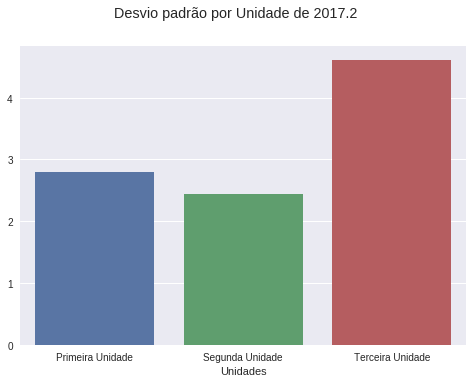

In [0]:
notas_edb_por_semestre = notas_edb.groupby(['semestre']).mean()[['media_final']]
desvio_padrao_por_unidade = [std_notas_edb_2017_2_1_unidade,std_notas_edb_2017_2_2_unidade,std_notas_edb_2017_2_3_unidade]
print(desvio_padrao_por_unidade)
sns.barplot(x=notas_edb_por_semestre.index, y=desvio_padrao_por_unidade)
plt.xticks(np.arange(3),('Primeira Unidade','Segunda Unidade','Terceira Unidade'))
plt.xlabel("Unidades")
plt.suptitle('Desvio padrão por Unidade de 2017.2')

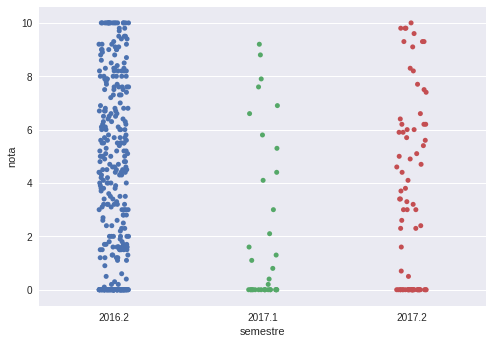

In [0]:
sns.stripplot(x = 'semestre', y = 'nota', data = notas_edb, jitter=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

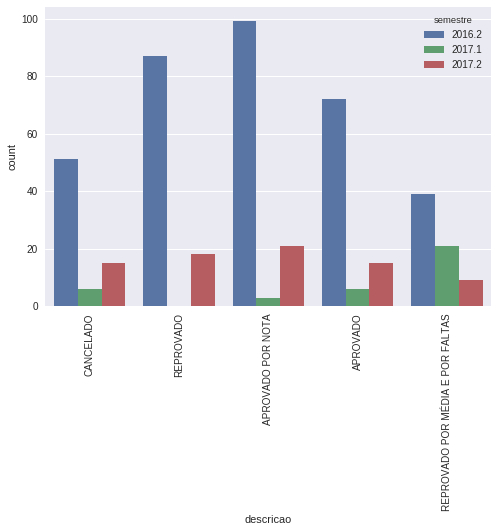

In [0]:
sns.countplot(x='descricao', hue='semestre', data=notas_edb)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([0, 1]), <a list of 2 Text xticklabel objects>)

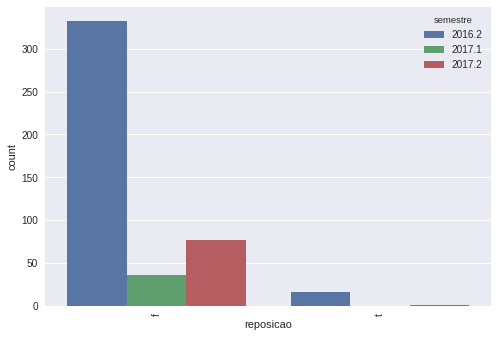

In [0]:
sns.countplot(x='reposicao', hue='semestre', data=notas_edb)
plt.xticks(rotation=90)